In [2]:
import numpy as np
from datascience import *
import math as m
import qgrid as q
import pandas as pd
import re
import scipy.stats
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
import matplotlib.image as mpimg
from sklearn.decomposition import PCA, IncrementalPCA
import sklearn.manifold
import seaborn as sns
import scipy.signal
from scipy import ndimage as ndi
import skimage
from skimage import measure
from skimage.metrics import structural_similarity as ssim
import argparse
import imutils
import cv2
from skimage import feature
import tensorflow 
import more_itertools as mit
import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from functools import reduce
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


/Users/jordanjomsky/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Formatter', 'percentile', 'Circle', 'DateFormatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
df = pd.read_csv("Data_Entry_2017_v2020.csv")
df['Finding Labels'].unique()

array(['Cardiomegaly', 'Cardiomegaly|Emphysema', 'Cardiomegaly|Effusion',
       'No Finding', 'Hernia', 'Hernia|Infiltration', 'Mass|Nodule',
       'Infiltration', 'Effusion|Infiltration', 'Nodule', 'Emphysema',
       'Effusion', 'Atelectasis', 'Effusion|Mass', 'Infiltration|Mass',
       'Infiltration|Mass|Pneumothorax', 'Mass',
       'Cardiomegaly|Infiltration|Mass|Nodule',
       'Cardiomegaly|Effusion|Emphysema|Mass',
       'Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax',
       'Emphysema|Mass', 'Emphysema|Mass|Pneumothorax', 'Pneumothorax',
       'Emphysema|Pneumothorax', 'Atelectasis|Pneumothorax',
       'Cardiomegaly|Emphysema|Pneumothorax', 'Mass|Pleural_Thickening',
       'Cardiomegaly|Mass|Pleural_Thickening', 'Pleural_Thickening',
       'Effusion|Emphysema|Infiltration|Pneumothorax',
       'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax',
       'Effusion|Pneumonia|Pneumothorax',
       'Effusion|Infiltration|Pneumothorax',
       'Effusion|Infiltra

(1024, 1024)


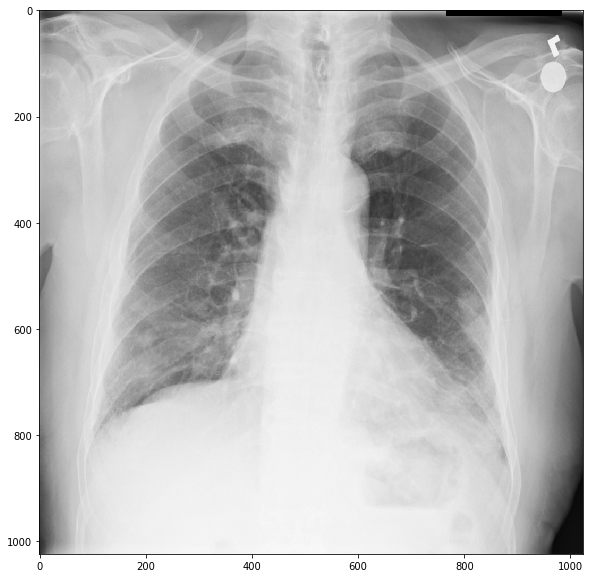

In [4]:
img = mpimg.imread('images/00000002_000.png')
print(img.shape)
imgplot = plt.imshow(img, cmap = plt.cm.gray)
plt.show()

(1024, 1024)


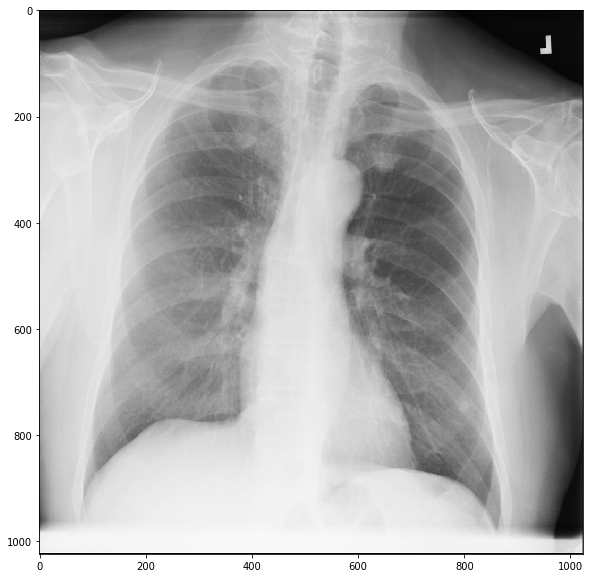

In [5]:
img = mpimg.imread('images/00000021_000.png')
print(img.shape)
imgplot = plt.imshow(img, cmap = plt.cm.gray)
plt.show()

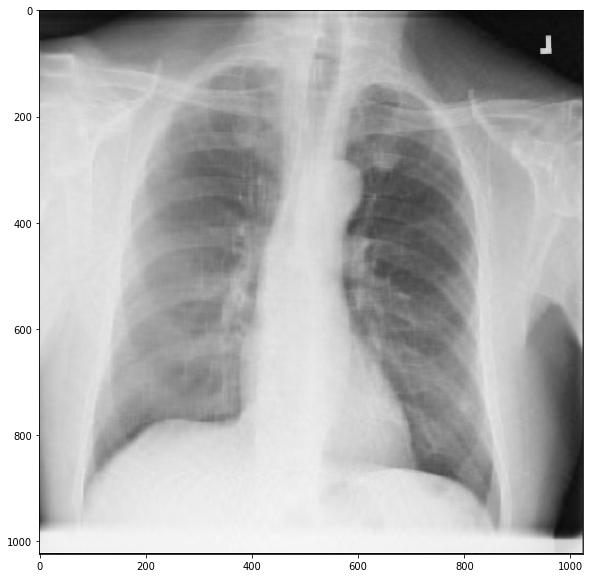

In [6]:
ipca = IncrementalPCA(n_components=50)
image_recon = ipca.inverse_transform(ipca.fit_transform(img))

plt.imshow(image_recon,cmap = plt.cm.gray)

In [7]:
# img = mpimg.imread('images/00000021_000.png')
img_data = pd.DataFrame(img).reset_index()
img_data.head()

,index,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0.035294,0.062745,0.058824,0.058824,0.054902,0.054902,0.054902,0.050980,0.054902,...,0.019608,0.023529,0.023529,0.023529,0.023529,0.023529,0.027451,0.031373,0.035294,0.019608
1,1,0.074510,0.125490,0.117647,0.113725,0.109804,0.109804,0.109804,0.105882,0.109804,...,0.039216,0.043137,0.043137,0.050980,0.050980,0.050980,0.054902,0.054902,0.062745,0.039216
2,2,0.070588,0.121569,0.109804,0.109804,0.101961,0.105882,0.105882,0.101961,0.101961,...,0.039216,0.039216,0.043137,0.043137,0.047059,0.047059,0.050980,0.050980,0.058824,0.035294
3,3,0.066667,0.113725,0.109804,0.101961,0.101961,0.101961,0.101961,0.098039,0.098039,...,0.039216,0.039216,0.039216,0.043137,0.043137,0.047059,0.047059,0.050980,0.054902,0.035294
4,4,0.066667,0.109804,0.101961,0.101961,0.098039,0.094118,0.094118,0.090196,0.094118,...,0.035294,0.035294,0.039216,0.043137,0.043137,0.047059,0.047059,0.050980,0.054902,0.035294


In [8]:
img_recon_data = pd.DataFrame(image_recon).head()
img_recon_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.040636,0.067196,0.061309,0.061373,0.058433,0.055639,0.052780,0.049330,0.049331,0.049723,...,0.021874,0.021468,0.022714,0.024486,0.028463,0.032039,0.036171,0.040011,0.045751,0.027444
1,0.070523,0.120200,0.112306,0.108667,0.105345,0.104311,0.106807,0.103286,0.100857,0.098986,...,0.047589,0.050071,0.053342,0.056115,0.057174,0.058591,0.059567,0.060698,0.065606,0.039904
2,0.067712,0.115039,0.106887,0.103550,0.100394,0.099178,0.101309,0.097823,0.095647,0.093772,...,0.045054,0.046535,0.049054,0.051020,0.051681,0.052824,0.053909,0.055105,0.060101,0.036746
3,0.065471,0.111006,0.102901,0.099647,0.096611,0.095323,0.097404,0.093931,0.092003,0.090240,...,0.043090,0.044300,0.046657,0.048266,0.048634,0.049487,0.050472,0.051609,0.056687,0.034924
4,0.063152,0.106938,0.099374,0.096417,0.093484,0.092119,0.094294,0.090872,0.089167,0.087698,...,0.041081,0.042562,0.045365,0.047156,0.047599,0.048194,0.048722,0.049467,0.054209,0.033499


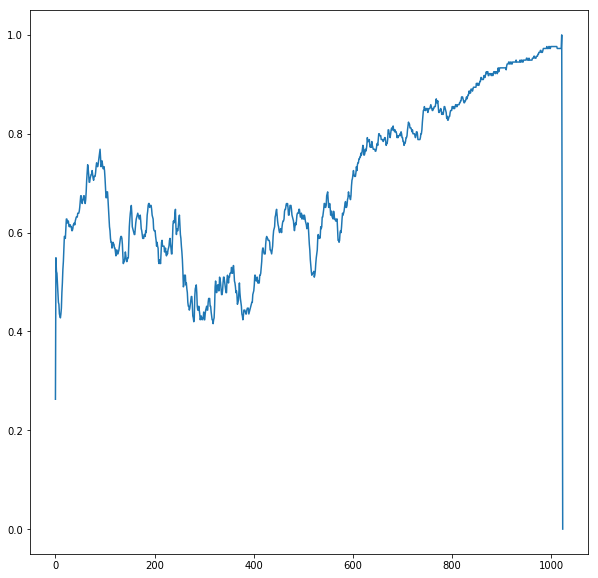

In [9]:
example_col = img_data[list(img_data.keys())[401]]
plt.plot(example_col)

In [10]:
scipy.signal.find_peaks(example_col)

(array([   1,   18,   22,   26,   29,   38,   51,   57,   65,   74,   83,
          90,   94,   98,  104,  116,  123,  132,  138,  141,  153,  166,
         171,  179,  182,  188,  192,  205,  210,  215,  222,  225,  231,
         238,  242,  245,  250,  261,  264,  274,  284,  289,  294,  299,
         305,  310,  323,  327,  331,  339,  347,  355,  359,  365,  371,
         381,  388,  402,  407,  409,  418,  426,  446,  454,  466,  468,
         474,  484,  491,  496,  499,  502,  509,  521,  530,  532,  535,
         542,  549,  553,  556,  561,  567,  575,  579,  585,  591,  601,
         607,  616,  620,  625,  629,  633,  636,  638,  649,  652,  664,
         671,  678,  681,  685,  690,  695,  697,  712,  720,  728,  744,
         749,  757,  768,  771,  777,  780,  784,  790,  800,  803,  807,
         820,  829,  834,  836,  839,  849,  851,  858,  864,  869,  871,
         876,  880,  885,  889,  893,  902,  914,  918,  929,  937,  940,
         950,  955,  965,  978,  991, 

In [11]:
smooth_col = scipy.signal.savgol_filter(example_col, 41, 2)
smooth_col

array([0.40743864, 0.41807184, 0.42844084, ..., 0.7467603 , 0.7209227 ,
       0.69395334], dtype=float32)

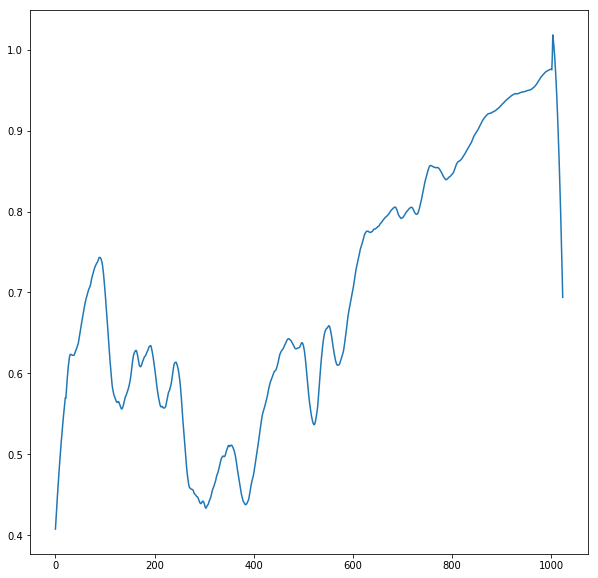

In [12]:
plt.plot(smooth_col)

In [13]:
peaks = scipy.signal.find_peaks(smooth_col)[0]
peaks

array([  20,   31,   36,   89,  127,  162,  192,  215,  243,  297,  338,
        349,  354,  470,  497,  551,  628,  630,  685,  716,  718,  756,
        771,  929,  941, 1000, 1003])

In [14]:
def rib_boundrary(peak):
    if peak > 200 and peak < 800:
        return True
    else:
        return False

In [15]:
rib_count = len([peak for peak in peaks if rib_boundrary(peak)])/2
rib_count

8.0

In [16]:
df['Distinct Diseases']=df['Finding Labels'].str.findall('[\w ]+')
df[df['Patient ID'] == 726]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Distinct Diseases
2733,00000726_000.png,No Finding,0,726,52,M,PA,2654,2717,0.143,0.143,[No Finding]


In [17]:
def retrieve_images(patient_id, show=False):
    this_df = df[df['Patient ID'] == patient_id]
    img_list = this_df['Image Index']
    for img_name in img_list:
        img = mpimg.imread("images/" + img_name)
        if show:
            imgplot = plt.imshow(img, cmap = plt.cm.gray)
            plt.show()
    return list(img_list)

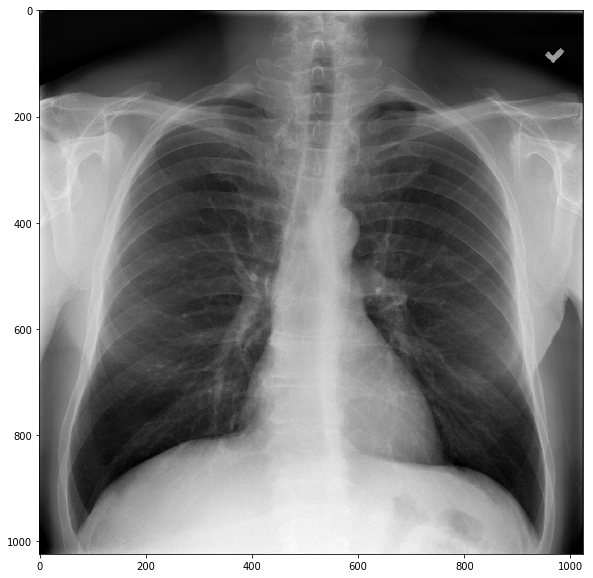

['00000726_000.png']

In [18]:
retrieve_images(726, show=True)

In [19]:
patient_profile = df[['Patient ID', 'Follow-up #', 'Patient Age', 'Patient Gender', 'Distinct Diseases', 'View Position']]
patient_profile

,Patient ID,Follow-up #,Patient Age,Patient Gender,Distinct Diseases,View Position
0,1,0,57,M,[Cardiomegaly],PA
1,1,1,58,M,"[Cardiomegaly, Emphysema]",PA
2,1,2,58,M,"[Cardiomegaly, Effusion]",PA
3,2,0,80,M,[No Finding],PA
4,3,0,74,F,[Hernia],PA
5,3,1,75,F,[Hernia],PA
6,3,2,76,F,"[Hernia, Infiltration]",PA
7,3,3,77,F,[Hernia],PA
8,3,4,78,F,[Hernia],PA
9,3,5,79,F,[Hernia],PA


In [20]:
grouped = df.groupby('Patient ID')

ls = []
for name, group in grouped:
    num = group['Follow-up #']
    dis = group['Distinct Diseases']
    ls += [dict(zip(num, dis))]

#grouped['Clinical History'] = ls


In [21]:
ids = patient_profile['Patient ID'].unique()

In [22]:
clinical_history = pd.DataFrame({'Patient ID': ids, 'Clinical History': ls})
clinical_history.head()

,Patient ID,Clinical History
0,1,"{0: ['Cardiomegaly'], 1: ['Cardiomegaly', 'Emp..."
1,2,{0: ['No Finding']}
2,3,"{0: ['Hernia'], 1: ['Hernia'], 2: ['Hernia', '..."
3,4,"{0: ['Mass', 'Nodule']}"
4,5,"{0: ['No Finding'], 1: ['No Finding'], 2: ['No..."


In [23]:
clinical_history.iloc[726,:]['Clinical History']

{0: ['Atelectasis'],
 1: ['No Finding'],
 2: ['No Finding'],
 3: ['No Finding'],
 4: ['No Finding'],
 5: ['No Finding'],
 6: ['Effusion', 'Infiltration'],
 7: ['No Finding'],
 8: ['No Finding'],
 9: ['Infiltration']}

In [24]:
def retrieve_record(patient_id):
    record = clinical_history.iloc[patient_id-1,:]['Clinical History']
    ls = []
    for visit in record:
        string = '|'.join(record[visit])
        ls += [string]
    patient_data = patient_profile[patient_profile['Patient ID'] == patient_id]
    return pd.DataFrame({'Age':patient_data['Patient Age'],'Gender':patient_data['Patient Gender'], 'View Position':patient_data['View Position'],'Visit Number':list(record.keys()), 'Clinical Histroy':ls})

In [25]:
retrieve_record(1)

,Age,Gender,View Position,Visit Number,Clinical Histroy
0,57,M,PA,0,Cardiomegaly
1,58,M,PA,1,Cardiomegaly|Emphysema
2,58,M,PA,2,Cardiomegaly|Effusion


In [26]:
patient_profile.head()#.groupby('Patient ID').agg(set)

,Patient ID,Follow-up #,Patient Age,Patient Gender,Distinct Diseases,View Position
0,1,0,57,M,[Cardiomegaly],PA
1,1,1,58,M,"[Cardiomegaly, Emphysema]",PA
2,1,2,58,M,"[Cardiomegaly, Effusion]",PA
3,2,0,80,M,[No Finding],PA
4,3,0,74,F,[Hernia],PA


In [27]:
def merge_lists(x, unique=True):
    if unique:
        return list(set([j for i in x for j in i]))
    return [j for i in x for j in i]

In [28]:
merge_lists([['a', 'b'], ['c']])

['b', 'a', 'c']

In [29]:
to_hist = patient_profile[['Patient ID','Distinct Diseases']].groupby('Patient ID').agg(merge_lists)
# df[df['col'].apply(lambda x: 'b' in x)]
nodules = patient_profile[patient_profile["Distinct Diseases"].apply(lambda x: 'Nodule' in x)]

In [31]:
total_disease_count = merge_lists(list(to_hist['Distinct Diseases']), unique=False)
pd.Series(total_disease_count).value_counts()

No Finding            24907
Infiltration           8035
Atelectasis            4981
Effusion               4275
Nodule                 3394
Mass                   2568
Consolidation          2150
Pleural_Thickening     2006
Cardiomegaly           1566
Pneumothorax           1487
Fibrosis               1260
Edema                  1073
Emphysema              1046
Pneumonia              1008
Hernia                  134
dtype: int64

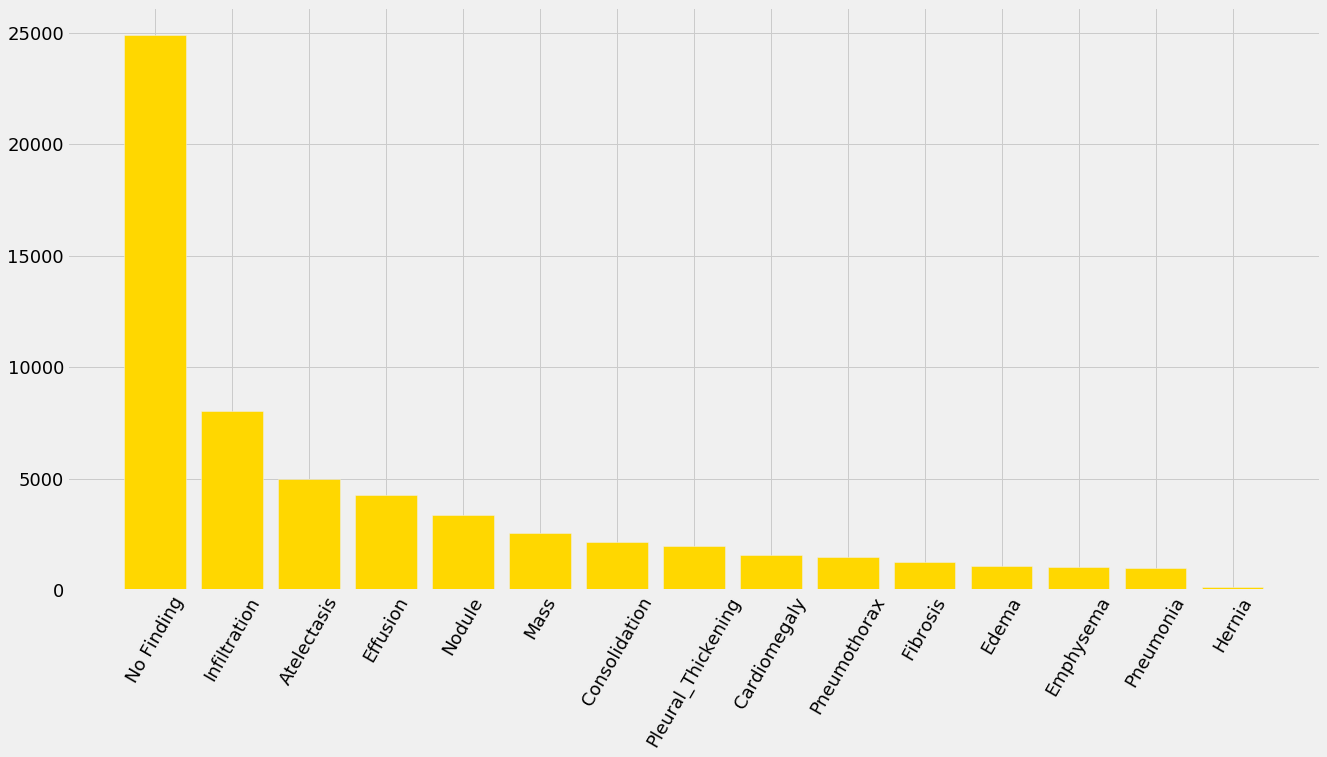

In [246]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 18})
bar_data = pd.DataFrame(pd.Series(total_disease_count).value_counts())
plt.figure(figsize=(20,10))
ax = plt.bar(list(bar_data.index), bar_data[0], color='gold')
plt.xticks(rotation=60)
plt.savefig('barchart.png')

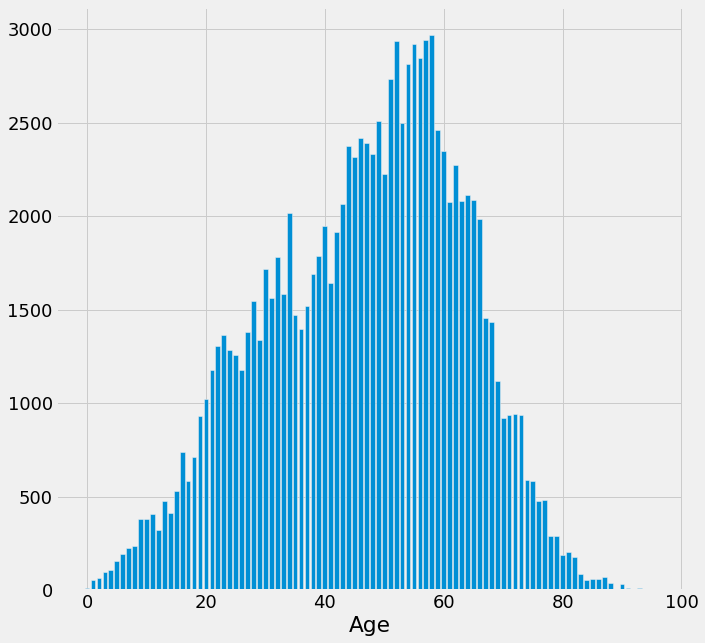

In [247]:
abc = pd.DataFrame(pd.Series(patient_profile['Patient Age']).value_counts()).reset_index()
plt.xlabel('Age')
plt.bar(abc['index'], abc['Patient Age'])
plt.savefig('agebar.png')

In [39]:
pd.Series(patient_profile['Patient Age']).describe()

count    112120.000000
mean         46.626365
std          16.602680
min           0.000000
25%          34.000000
50%          49.000000
75%          59.000000
max          95.000000
Name: Patient Age, dtype: float64

# Paper Review

In [248]:
factors = ["Haemoptysis", "History of malignancy", "Age>70 years", "Smoker", "Spiculated edges", "Size> 3 cm", "Size 2.1-3 cm", "Malignant growth rate", "Contrast enhancement"]
ratios = [5.08, 4.95, 4.16, 2.27, 5.54, 5.23, 3.67, 3.40, 2.32]
malignancy_table = pd.DataFrame({"Factors":factors, "Likelihood Ratio":ratios})
malignancy_table

,Factors,Likelihood Ratio
0,Haemoptysis,5.08
1,History of malignancy,4.95
2,Age>70 years,4.16
3,Smoker,2.27
4,Spiculated edges,5.54
5,Size> 3 cm,5.23
6,Size 2.1-3 cm,3.67
7,Malignant growth rate,3.40
8,Contrast enhancement,2.32


In [249]:
nodules.head()

,Patient ID,Follow-up #,Patient Age,Patient Gender,Distinct Diseases,View Position
12,4,0,82,M,"[Mass, Nodule]",AP
25,8,2,72,F,[Nodule],PA
41,13,3,56,M,"[Cardiomegaly, Infiltration, Mass, Nodule]",PA
88,17,0,77,M,"[Effusion, Infiltration, Nodule]",PA
96,21,0,77,M,[Nodule],PA


In [250]:
retrieve_images(21)

['00000021_000.png', '00000021_001.png']

In [251]:
img = mpimg.imread('images/00000021_000.png')
im = img

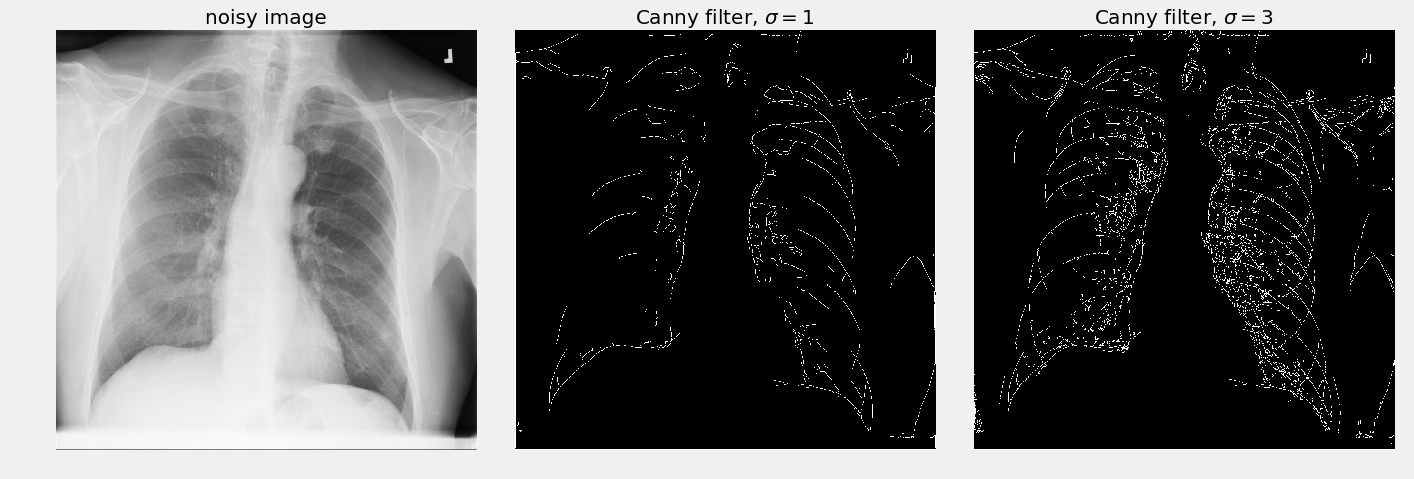

In [252]:
#im = ndi.rotate(im, 15, mode='constant')
#im = ndi.gaussian_filter(im, 4)
#im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
# img = mpimg.imread('images/00000021_000.png')
edges1 = feature.canny(im, sigma=1)#, low_threshold=0, high_threshold=0)
edges2 = feature.canny(im, sigma=0.01)#, low_threshold=0.1, high_threshold=0.3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

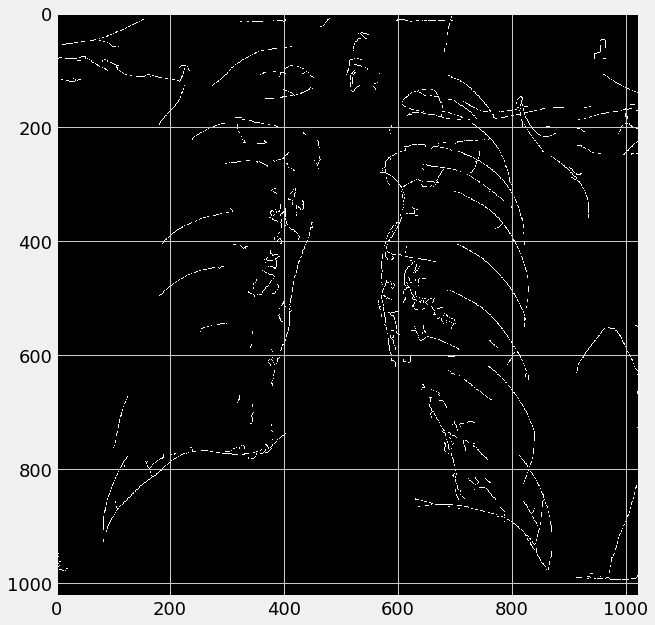

In [253]:
imshow(edges1, cmap=plt.cm.gray)
plt.show()

In [254]:
im

array([[0.03529412, 0.0627451 , 0.05882353, ..., 0.03137255, 0.03529412,
        0.01960784],
       [0.07450981, 0.1254902 , 0.11764706, ..., 0.05490196, 0.0627451 ,
        0.03921569],
       [0.07058824, 0.12156863, 0.10980392, ..., 0.05098039, 0.05882353,
        0.03529412],
       ...,
       [0.5686275 , 1.        , 0.9764706 , ..., 0.96862745, 1.        ,
        0.5647059 ],
       [0.27450982, 0.48235294, 0.46666667, ..., 0.46666667, 0.48235294,
        0.26666668],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [255]:
def edges(images_id, show=False):
    img = mpimg.imread('images/' + images_id)
    try:
        edge = feature.canny(img[:,:,0], sigma=0.95)
    except:
        edge = feature.canny(img, sigma=0.95)
    if show:
        imshow(edges1, cmap=plt.cm.gray)
        plt.show()
    return edge

In [256]:
string = retrieve_images(4)[0]
edges(string)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False]])

In [257]:
def patients_with_condition(condition):
    to_hist = patient_profile[['Patient ID','Distinct Diseases']].groupby('Patient ID').agg(merge_lists)
    with_condition = patient_profile[patient_profile["Distinct Diseases"].apply(lambda x: condition in x)]
    return with_condition

In [258]:
patients_with_condition('No Finding').columns, retrieve_record(2).columns

(Index(['Patient ID', 'Follow-up #', 'Patient Age', 'Patient Gender',
        'Distinct Diseases', 'View Position'],
       dtype='object'),
 Index(['Age', 'Gender', 'View Position', 'Visit Number', 'Clinical Histroy'], dtype='object'))

In [259]:
def find_similar_patients(patient_id, no_finding_control=False, small=True):
    record = retrieve_record(patient_id)
    age = list(record['Age'])[0]
    gender = list(record['Gender'])[0]
    view_positon = list(record['View Position'])[0]
    if no_finding_control:
        df = patients_with_condition('No Finding')
    else:
        df = patient_profile
    gendered = df[df['Patient Gender'] == gender]
    viewed = gendered[gendered['View Position'] == view_positon]
    aged = viewed[viewed['Patient Age'] <= age+5]
    final = aged[aged['Patient Age'] >= age-5]
    if final.shape[0] == 0:
        print("No matches found!")
        return None
    if small:
        return final[final['Patient ID'] < 1336]
    return final

In [260]:
find_similar_patients(1000, no_finding_control=True).head()

,Patient ID,Follow-up #,Patient Age,Patient Gender,Distinct Diseases,View Position
1104,272,1,29,F,[No Finding],PA
1105,272,2,30,F,[No Finding],PA
1106,272,3,31,F,[No Finding],PA
1107,272,4,32,F,[No Finding],PA
1108,272,5,35,F,[No Finding],PA


In [261]:
no_findings = patients_with_condition('No Finding')
no_findings.head()

,Patient ID,Follow-up #,Patient Age,Patient Gender,Distinct Diseases,View Position
3,2,0,80,M,[No Finding],PA
13,5,0,69,F,[No Finding],PA
14,5,1,69,F,[No Finding],AP
15,5,2,69,F,[No Finding],AP
16,5,3,69,F,[No Finding],PA


In [262]:
no_findings_temp = find_similar_patients(157, no_finding_control=True)
no_findings_IDs = no_findings_temp['Patient ID'].unique()

In [265]:
def normalize(a):
    row_sums = a.sum(axis=1)
    new_matrix = a / row_sums[:, numpy.newaxis]
    return new_matrix

In [267]:
avg_edges = np.zeros((1024,1024))
for ID in np.random.choice(no_findings_IDs, 100):
    img_id = retrieve_images(ID)[0]
    edges_detected = edges(img_id).astype(int)
    avg_edges = avg_edges + edges_detected
avg_edges = avg_edges * (1/100)
avg_edges

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.18, 0.14, ..., 0.18, 0.32, 0.  ],
       [0.  , 0.21, 0.06, ..., 0.03, 0.29, 0.  ],
       ...,
       [0.  , 0.21, 0.13, ..., 0.02, 0.35, 0.  ],
       [0.  , 0.25, 0.18, ..., 0.14, 0.35, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [268]:
def brighten(arr, my_max=1):
    inv_factor = max([max(arr) for arr in avg_edges])
    factor = my_max / inv_factor
    return arr * factor
brighten(avg_edges)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.31034483, 0.24137931, ..., 0.31034483, 0.55172414,
        0.        ],
       [0.        , 0.36206897, 0.10344828, ..., 0.05172414, 0.5       ,
        0.        ],
       ...,
       [0.        , 0.36206897, 0.22413793, ..., 0.03448276, 0.60344828,
        0.        ],
       [0.        , 0.43103448, 0.31034483, ..., 0.24137931, 0.60344828,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [269]:
max([max(arr) for arr in brighten(avg_edges)])

1.0

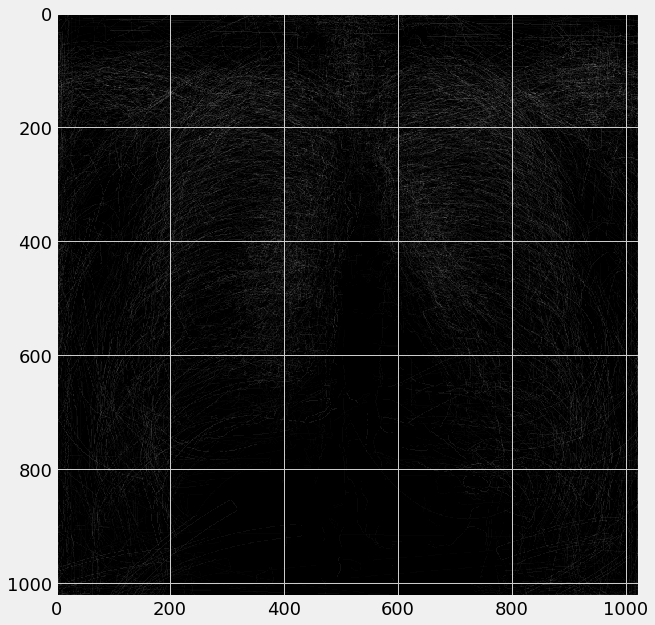

In [270]:
plt.imshow(brighten(avg_edges), cmap=plt.cm.gray)
plt.show()

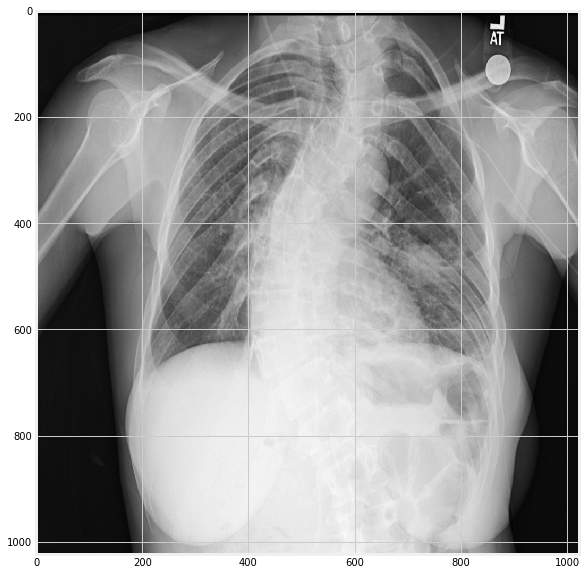

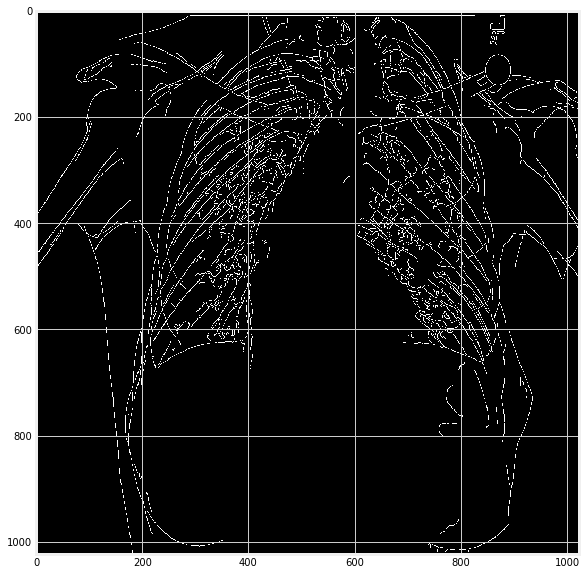

In [540]:
eight_edges = edges(retrieve_images(157, show=True)[0])
plt.imshow((eight_edges), cmap=plt.cm.gray)
plt.show()

In [272]:
(score, diff) = ssim(avg_edges, eight_edges, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.504391391014874


# Find Abnormalities

In [623]:
img_data = pd.DataFrame(brighten(avg_edges))
test_data = pd.DataFrame(eight_edges)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


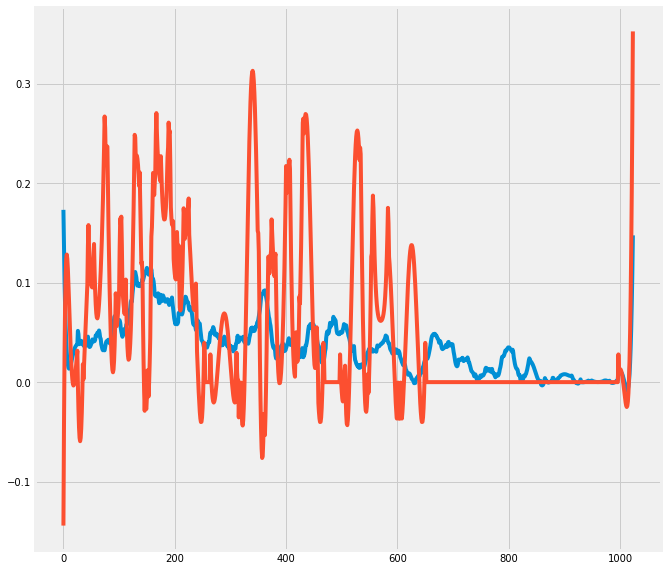

In [624]:
example_col = img_data[list(img_data.keys())[720]]
test_col = test_data[list(test_data.keys())[720]].astype(float)
plt.plot(scipy.signal.savgol_filter(example_col, 51, 5))
plt.plot(scipy.signal.savgol_filter(test_col, 51, 5))

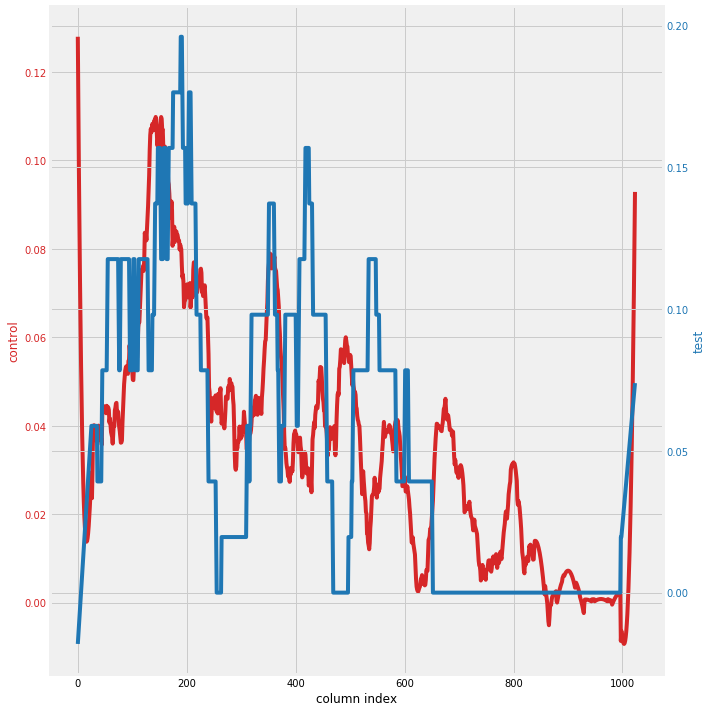

In [625]:
#t = np.arange(0, 1025, 1)
data1 = scipy.signal.savgol_filter(example_col, 51, 3)
data2 = scipy.signal.savgol_filter(test_col, 51, 1)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('column index')
ax1.set_ylabel('control', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('test', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [626]:
ls = [m.isclose(x, 0, abs_tol=0.01) for x in data2]
boos = [i for i, x in enumerate(ls) if x]
consecs = [list(group) for group in mit.consecutive_groups(boos)][0:-1]
max(consecs, key=lambda y: len(y))

[469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496]

In [627]:
def focus(float_arr, row=0, col=0):
    ls = [m.isclose(x, 0, abs_tol=0.01) for x in float_arr]
    boos = [i for i, x in enumerate(ls) if x]
    consecs = [list(group) for group in mit.consecutive_groups(boos)][0:-1]
    long_list = max(consecs, key=lambda y: len(y))
    if col:
        return [[col, long_list[0]],[col, long_list[-1]]]
    else:
        return [[long_list[0], row],[long_list[-1], row]]

In [628]:
def grid_overlay(img, step_size=1):
    df = pd.DataFrame(img)
    chords = []
    for col in np.arange(150,901,step_size):
        this_col = df[list(df.keys())[col]].astype(float)
        step_fn = scipy.signal.savgol_filter(this_col, 51, 1)
        try:
            chord = focus(step_fn, col=col)
        except:
            continue
        chords += [chord]
    for row in np.arange(200,800,step_size):
        this_row = df.iloc[[row]].T
        step_fn = scipy.signal.savgol_filter(np.ravel(this_row), 51, 1)
        try:
            chord = focus(step_fn, row=row)
        except:
            continue
        chords += [chord]
    return chords

In [629]:
lines = grid_overlay(eight_edges, step_size=1)
[item for sublist in lines for item in sublist]

[[150, 434],
 [150, 760],
 [151, 434],
 [151, 767],
 [152, 433],
 [152, 775],
 [153, 433],
 [153, 784],
 [154, 432],
 [154, 796],
 [155, 432],
 [155, 803],
 [156, 431],
 [156, 819],
 [157, 430],
 [157, 836],
 [158, 429],
 [158, 848],
 [159, 429],
 [159, 856],
 [160, 429],
 [160, 864],
 [161, 429],
 [161, 869],
 [162, 428],
 [162, 876],
 [163, 428],
 [163, 883],
 [164, 427],
 [164, 887],
 [165, 427],
 [165, 893],
 [166, 427],
 [166, 899],
 [167, 427],
 [167, 903],
 [168, 426],
 [168, 736],
 [169, 426],
 [169, 728],
 [170, 426],
 [170, 721],
 [171, 426],
 [171, 716],
 [172, 426],
 [172, 712],
 [173, 425],
 [173, 708],
 [174, 425],
 [174, 704],
 [175, 425],
 [175, 700],
 [176, 425],
 [176, 696],
 [177, 425],
 [177, 694],
 [178, 425],
 [178, 691],
 [179, 425],
 [179, 689],
 [180, 425],
 [180, 686],
 [181, 425],
 [181, 682],
 [182, 425],
 [182, 677],
 [183, 425],
 [183, 654],
 [184, 429],
 [184, 644],
 [185, 435],
 [185, 633],
 [186, 176],
 [186, 372],
 [187, 177],
 [187, 372],
 [188, 177],

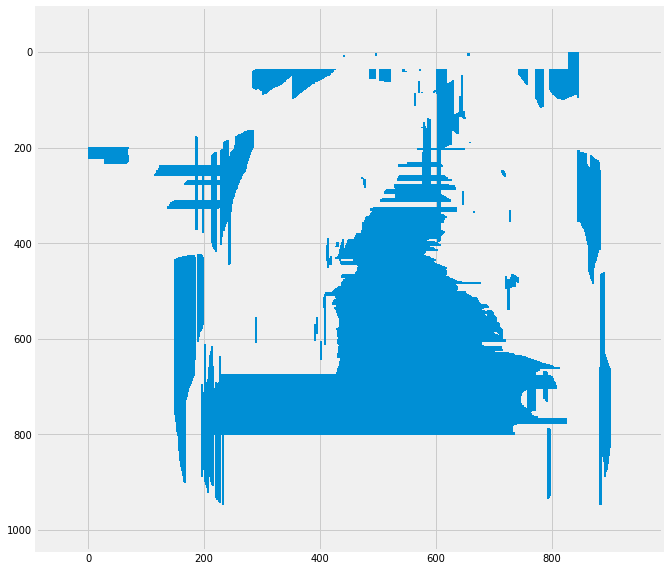

In [630]:
import pylab as pl
from matplotlib import collections  as mc

#c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.margins(0.1)
plt.gca().invert_yaxis()

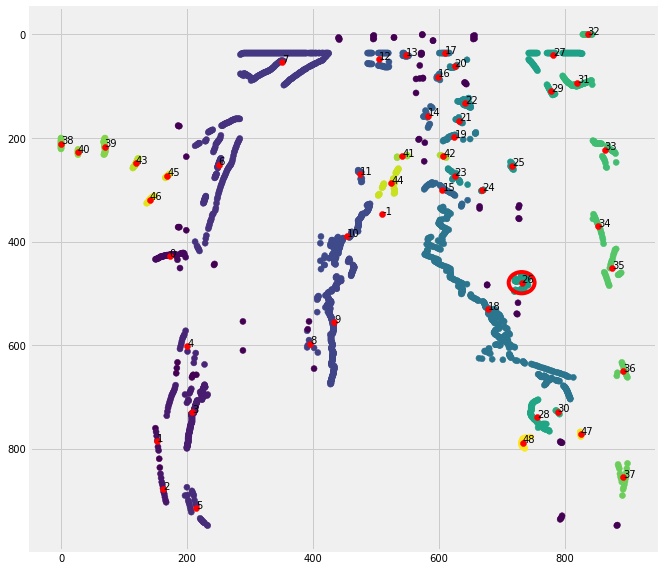

In [640]:
fig, ax = plt.subplots()
flat = [item for sublist in lines for item in sublist]
clustering = DBSCAN(eps=20).fit(flat)
x, y = np.array(flat).T
ax.scatter(x, y, c=clustering.labels_)
ax.scatter(centroids.x_centroid, centroids.y_centroid , c='r')

for i, txt in enumerate(centroids.label):
    ax.annotate(txt, (centroids.x_centroid[i], centroids.y_centroid[i]))

plt.gca().invert_yaxis()

drawing_uncolored_circle = plt.Circle((731.820513, 479.179487), 20.558555,fill = False,color='r',lw=4)
ax.add_artist(drawing_uncolored_circle)

In [632]:
coords=pd.DataFrame({"x":x,"y":y,"label":clustering.labels_})
coords.head()#.groupby("label").count()

,x,y,label
0,150,434,0
1,150,760,-1
2,151,434,0
3,151,767,1
4,152,433,0


In [634]:
def find_centroid(df):
    length = df.shape[0]
    sum_x = np.sum(df['x'])
    sum_y = np.sum(df['y'])
    return sum_x/length, sum_y/length

In [635]:
def centroid_deviance(df, centroid):
    x = list(df['x'])
    y = list(df['y'])
    distances = []
    for i in range(len(x)):
        point = np.array((x[i], y[i]))
        distance = np.linalg.norm(point - centroid)
        distances += [distance]
    return np.mean(distances), max(distances)

In [644]:
def make_centroid_df(df):
    labels = np.unique(df['label'])
    centroids = []
    deviances = []
    roundnesses = []
    max_deviance = []
    magnitudes = list(df.groupby("label").count()['x'])
    for label in labels:
        this_label = df[df['label']==label]
        if this_label.shape[0] == 0:
            roundnesses += [0]
            centroids += [[0,0]]
            deviances += [0]
            max_deviance += [0]
            continue
        roundnesses += [roundness(label)]
        centroid = find_centroid(this_label[['x','y']])
        deviance, maxd = centroid_deviance(this_label, centroid)
        centroids += [centroid]
        deviances += [deviance]
        max_deviance += [maxd]
    mid_df = pd.DataFrame({"label":labels,"centroid":centroids, "magnitude":magnitudes, "deviance":deviances, "max_deviance":max_deviance, "roundness":roundnesses})
    mid_df[['x_centroid','y_centroid']] = mid_df['centroid'].apply(pd.Series)
    return mid_df[['label','x_centroid','y_centroid','deviance','max_deviance','roundness','magnitude']]

In [645]:
centroidnp(coords[coords['label']==0][['x','y']])

(172.62222222222223, 427.73333333333335)

In [646]:
centroids = make_centroid_df(coords)
#centroids[['x_centroid','y_centroid']] = centroids['centroid'].apply(pd.Series)
max_roundness = max(centroids['roundness'])
ix_max_roundness = centroids.index[centroids.roundness == max_roundness]
centroids.loc[list(ix_max_roundness)[0], :]['x_centroid']

731.8205128205128

In [647]:
def convex_hull_graham(points):
    '''
    Returns points on convex hull in CCW order according to Graham's scan algorithm. 
    By Tom Switzer <thomas.switzer@gmail.com>.
    '''
    TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)

    def cmp(a, b):
        return (a > b) - (a < b)

    def turn(p, q, r):
        return cmp((q[0] - p[0])*(r[1] - p[1]) - (r[0] - p[0])*(q[1] - p[1]), 0)

    def _keep_left(hull, r):
        while len(hull) > 1 and turn(hull[-2], hull[-1], r) != TURN_LEFT:
            hull.pop()
        if not len(hull) or hull[-1] != r:
            hull.append(r)
        return hull

    points = sorted(points)
    l = reduce(_keep_left, points, [])
    u = reduce(_keep_left, reversed(points), [])
    return l.extend(u[i] for i in range(1, len(u) - 1)) or l

$$\text{Circularity} = \frac{4 * \pi * Area}{Perimeter ^ 2}$$

In [648]:
hull = convex_hull_graham(coords[coords['label']==26][['x','y']].values.tolist())
(4 * m.pi * area(hull)) / (perimeter(hull) ** 2), area(hull), perimeter(hull)

(0.8365072222107078, 548.5, 90.77335775132084)

In [649]:
hull_tri = [[5,0],[0,5],[-5,0]]
(4 * m.pi * area(hull_tri)) / (perimeter(hull_tri) ** 2), area(hull_tri), perimeter(hull_tri)

(0.5390120844526473, 25.0, 24.14213562373095)

In [650]:
max([roundness(i) for i in range(-1,49)])

0.8365072222107078

In [651]:
def roundness(label):
    hull = convex_hull_graham(coords[coords['label']==label][['x','y']].values.tolist())
    a = area(hull)
    p = perimeter(hull)
    if a == 0 or p == 0:
        return 0
    return (4 * m.pi * a / (p ** 2))

In [652]:
def perimeter(hull):
    if hull == []:
        return 0
    length = 0
    last_point = np.array(hull[0])
    for point in hull:
        point = np.array(point)
        distance = np.linalg.norm(last_point - point)
        length += distance
        last_point = point
    return length + np.linalg.norm(last_point - np.array(hull[0]))

In [653]:
def area(hull):
    sep_hull = list(map(list, zip(*hull)))
    if sep_hull == []:
        return 0
    x = sep_hull[0]
    y = sep_hull[1]
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [654]:
def points_from_lines(lines):
    flat = [item for sublist in lines for item in sublist]
    clustering = DBSCAN(eps=20).fit(flat)
    x, y = np.array(flat).T
    plt.scatter(x, y, c=clustering.labels_)
    plt.gca().invert_yaxis()
    coords=pd.DataFrame({"x":x,"y":y,"label":clustering.labels_})
    return coords

In [658]:
def master_train(img, show=True):
    lines_=grid_overlay(img, step_size=1)
    flat_=[item for sublist in lines_ for item in sublist]
    clustering_=DBSCAN(eps=20).fit(flat_)
    x_, y_ = np.array(flat_).T
    coords_=pd.DataFrame({"x":x_,"y":y_,"label":clustering_.labels_})
    centroids_=make_centroid_df(coords_)
    if show:
        fig, ax = plt.subplots()
        ax.scatter(x_, y_, c=clustering_.labels_)
        ax.scatter(centroids_.x_centroid, centroids_.y_centroid , c='r')

        for i, txt in enumerate(centroids_.label):
            ax.annotate(txt, (centroids_.x_centroid[i], centroids_.y_centroid[i]))

        plt.gca().invert_yaxis()
        
        max_roundness = max(centroids_['roundness'])
        ix_max_roundness = centroids_.index[centroids_.roundness == max_roundness]
        row = centroids_.loc[list(ix_max_roundness)[0], :]
        print(row)
        drawing_uncolored_circle = plt.Circle((row['x_centroid'], row['y_centroid']), row.max_deviance,fill = False,color='r',lw=4)
        ax.add_artist(drawing_uncolored_circle)
    return centroids_

label            26.000000
x_centroid      731.820513
y_centroid      479.179487
deviance         11.944772
max_deviance     20.558555
roundness         0.836507
magnitude        39.000000
Name: 27, dtype: float64


,label,x_centroid,y_centroid,deviance,max_deviance,roundness,magnitude
0,-1,510.439024,347.012195,353.892302,707.098312,0.761256,82
1,0,172.622222,427.733333,12.696354,28.452933,0.665606,45
2,1,153.000000,785.000000,11.663355,18.110770,0.015562,5
3,2,162.500000,877.800000,15.407202,30.137850,0.027295,10
4,3,208.269231,729.653846,34.404319,69.837449,0.648761,156


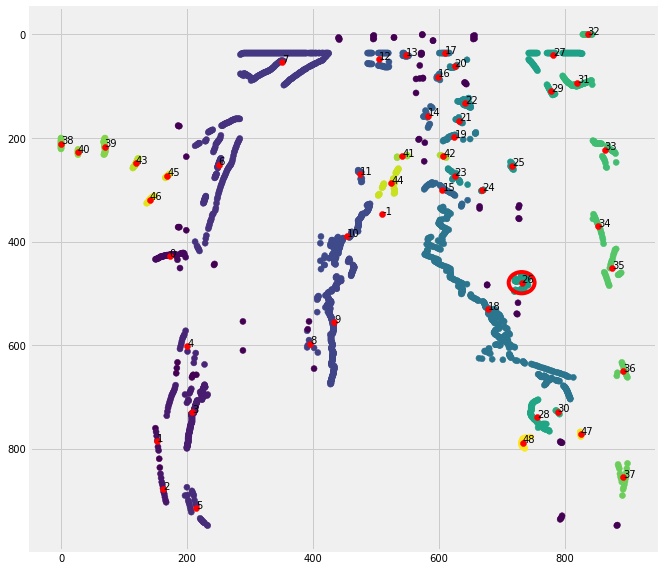

In [659]:
master_train(eight_edges).head()

label            26.000000
x_centroid      453.500000
y_centroid      151.166667
deviance          1.952726
max_deviance      3.100179
roundness         0.836507
magnitude         6.000000
Name: 27, dtype: float64


,label,x_centroid,y_centroid,deviance,max_deviance,roundness,magnitude
0,-1,625.262295,407.344262,302.059007,612.253556,0.761256,61
1,0,191.857143,132.666667,27.581204,51.692664,0.665606,84
2,1,156.000000,595.615385,5.439562,9.514859,0.015562,13
3,2,163.245614,384.438596,26.913982,57.997339,0.027295,114
4,3,194.022346,267.905028,37.164518,102.788026,0.648761,179
5,4,230.000000,491.000000,1.495742,2.828427,0.508279,5
6,5,250.000000,578.864865,11.398479,26.270771,0.371490,37
7,6,253.500000,644.066667,11.697028,28.843043,0.410810,30
8,7,272.500000,80.666667,3.280574,9.202958,0.644079,6
9,8,272.500000,147.333333,3.103131,8.661858,0.363027,6


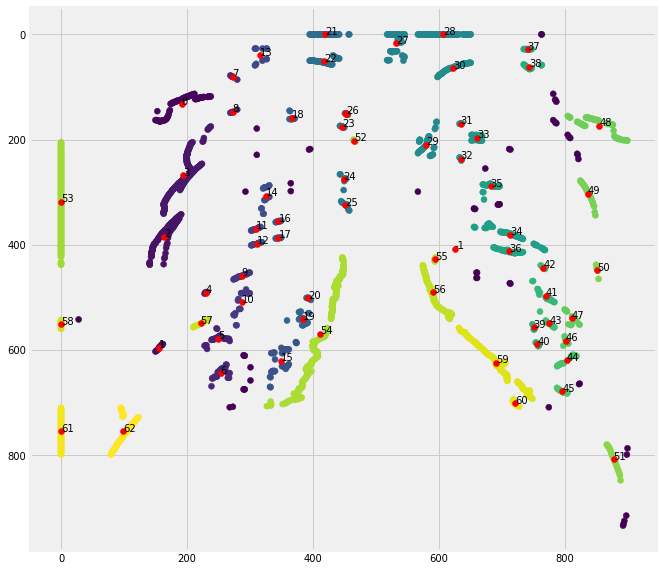

In [660]:
master_train(edges(retrieve_images(2)[0]), show=True)

# Keras Try

In [57]:
%tensorflow_version 2.x
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.utils import  plot_model
import matplotlib.pyplot as plt

BATCH_SIZE = 64
EPOCH_SIZE = 64

UsageError: Line magic function `%tensorflow_version` not found.


In [58]:
vgg = keras.applications.VGG16(input_shape=[1024, 1024, 3], include_top=False, weights='imagenet')
x = Flatten()(vgg.output)
x = Dense(3, activation='sigmoid')(x)
model1 = Model(vgg.input, x)
model1.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))

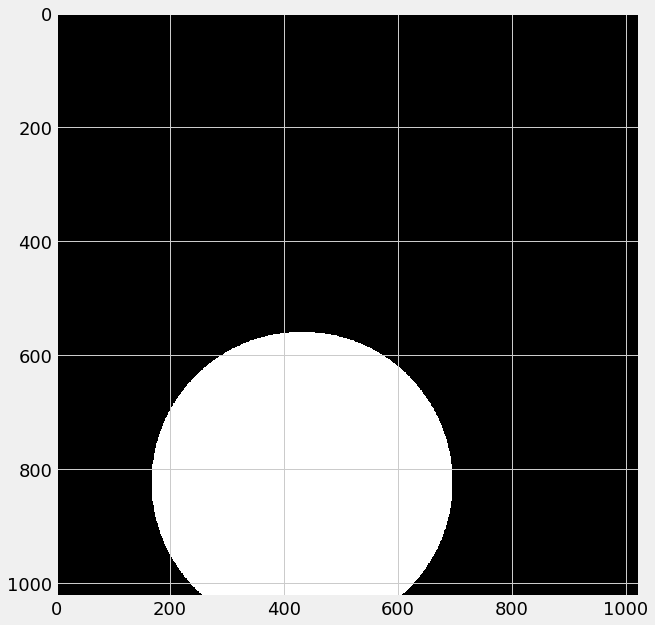

In [59]:
from matplotlib.patches import Circle

def synthetic_gen(batch_size=64):
  # enable generating infinite amount of batches
  while True:
    # generate black images in the wanted size
    X = np.zeros((batch_size, 1024, 1024, 3))
    Y = np.zeros((batch_size, 3))
      # fill each image
    for i in range(batch_size):
        x = np.random.randint(8,1020)
        y = np.random.randint(8,1020)
        r = np.random.randint(4,300)
        for x_i in range(1024):
            for y_i in range(1024):
                if ((x_i - x)**2) + ((y_i - y)**2) < r**2:
                    X[i, x_i, y_i,:] = 1
        Y[i,0] = (x-r)/1024.
        Y[i,1] = (y-r)/1024.
        Y[i,2] = 2*r / 1024.
    yield X, Y

# sanity check - plot the images
x,y = next(synthetic_gen())
plt.imshow(x[0])

In [ ]:
model1.fit_generator(synthetic_gen(),steps_per_epoch=1,epochs=1)

In [ ]:
from matplotlib.patches import Rectangle

# given image and a label, plots the image + rectangle
def plot_pred(img,p):
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    rect = Rectangle(xy=(p[1]*128,p[0]*128),width=p[2]*128, height=p[2]*128, linewidth=1,edgecolor='g',facecolor='none')
    ax.add_patch(rect)
    plt.show()


# generate new image
x = eight_edges
# predict
pred = model1.predict(x)
# examine 1 image
im = x[0]
p = pred[0]
plot_pred(im,p)